An experiment was conducted to determine the effect of pressure and temperature on the yield of a chemical substance. Two levels of pressure (in pounds per square inch, psi) and three levels of temperature were used:

- Pressure: 50, 80
- Temperature (F): 100, 200, 300

A test of the experiment at each temperature-pressure combination yielded the following data:

\[
\begin{array}{|c|c|c|}
\hline
\text{Yield} & \text{Pressure} & \text{Temperature} \\
\hline
21 & 50 & 100 \\
23 & 50 & 200 \\
26 & 50 & 300 \\
22 & 80 & 100 \\
23 & 80 & 200 \\
28 & 80 & 300 \\
\hline
\end{array}
\]

1. Fit the model $ Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \epsilon $, where $ x_1 $ is pressure and $ x_2 $ is temperature.
2. Test if $ \beta_3 $ differs significantly from zero, with $ \alpha = 0.05 $.
3. Test the hypothesis that temperature does not affect yield, with $ \alpha = 0.05 $.



In [1]:
import pandas as pd
import statsmodels.api as sm

# Data
data = {
    "Performance": [21, 23, 26, 22, 23, 28],
    "Pressure": [50, 50, 50, 80, 80, 80],
    "Temperature": [100, 200, 300, 100, 200, 300],
}

df = pd.DataFrame(data)

# Add the squared term for Temperature
df["Temperature^2"] = df["Temperature"] ** 2

# Define predictors and add a constant
X = df[["Pressure", "Temperature", "Temperature^2"]]
X = sm.add_constant(X)
y = df["Performance"]

# Fit the model
model = sm.OLS(y, X).fit()

# Extract coefficients
beta0 = model.params["const"]
beta1 = model.params["Pressure"]
beta2 = model.params["Temperature"]
beta3 = model.params["Temperature^2"]

# Print the adjusted model
print(f"The fitted model is: y = {beta0:.2f} + {beta1:.4f}*Pressure + {beta2:.4f}*Temperature + {beta3:.4f}*Temperature^2")

# Test for beta3
p_value_beta3 = model.pvalues["Temperature^2"]
print(f"\nTest for the quadratic term of Temperature (beta3):")
print(f"Coefficient beta3: {beta3:.4f}, p-value: {p_value_beta3:.4f}")
print("The quadratic term of Temperature does not significantly affect Performance at a 0.05 significance level.")

# Test for beta2
p_value_beta2 = model.pvalues["Temperature"]

print(f"\nT-test for the effect of Temperature (beta2):")
print(f"p-value: {p_value_beta2:.4f}")
print("Temperature does not significantly affect Performance (we fail to reject H0) IN THIS MODEL at a 0.05 significance level (the quadratic term was already excluded from consideration).")


The fitted model is: y = 20.33 + 0.0333*Pressure + -0.0225*Temperature + 0.0001*Temperature^2

Test for the quadratic term of Temperature (beta3):
Coefficient beta3: 0.0001, p-value: 0.1780
The quadratic term of Temperature does not significantly affect Performance at a 0.05 significance level.

T-test for the effect of Temperature (beta2):
p-value: 0.4592
Temperature does not significantly affect Performance (we fail to reject H0) IN THIS MODEL at a 0.05 significance level (the quadratic term was already excluded from consideration).


The data in the following table come from comparing growth percentages for bacteria types A and B. Growth \( Y \) was recorded at five equally spaced (and coded) time points shown in the table:

\[
\begin{array}{|c|c|c|}
\hline
\text{Coded Time} & \text{Bacteria A} & \text{Bacteria B} \\
\hline
-2 & 8.0 & 10.0 \\
-1 & 9.0 & 10.3 \\
0 & 9.1 & 12.2 \\
1 & 10.2 & 12.6 \\
2 & 10.4 & 13.9 \\
\hline
\end{array}
\]

1. Fit the linear model $ Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon $ to the $ n = 10 $ points. Let $ x_1 = 1 $ if the point refers to bacteria type B and $ x_1 = 0 $ if the point refers to bacteria type A. Let $x_2 $ be coded time.
2. Plot the points and the two growth rate lines. Interpret $ \beta_3 $ as the difference between the slopes of the two lines, representing the time-bacteria interaction.
3. Predict the growth of type A at time $ x_2 = 0 $ and compare the result with the graph. Repeat the process for type B.
4. Do the data provide sufficient evidence to indicate a difference in growth percentages for the two types of bacteria?


Estimated coefficients (betas): [11.8  -2.46  1.01 -0.41]


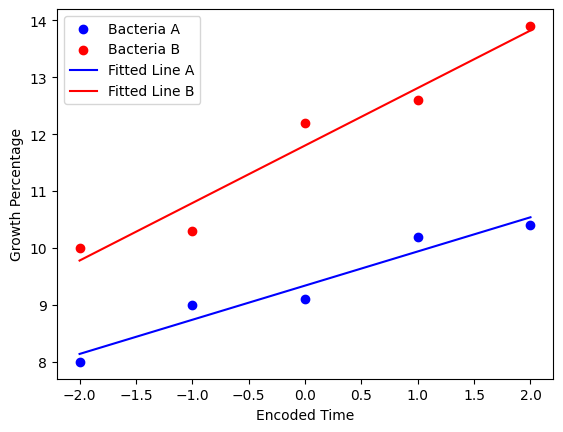

Prediction for Bacteria A at x2=0: 9.339999999999998
Prediction for Bacteria B at x2=0: 11.800000000000004
Interaction coefficient (β3): -0.40999999999999703
P-value for the interaction coefficient: 0.03924040998017229
Therefore, the null hypothesis is rejected, and β3 is significantly different from 0.
There is sufficient evidence (p = 0.000) to conclude that the growth percentages (B_1) are significantly different between the two bacteria.

Given that the interaction term β3 and the growth term related to bacteria type β1 are significantly different from 0, we conclude that the growth percentages do vary depending on the type of bacteria at a 0.05 significance level.


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define time and bacterial growth data
time = np.array([-2, -1, 0, 1, 2])
bacteria_a = np.array([8.0, 9.0, 9.1, 10.2, 10.4])
bacteria_b = np.array([10.0, 10.3, 12.2, 12.6, 13.9])

# Create variables for the model, to be analyzed "jointly"
x1 = np.concatenate((np.ones_like(time), np.zeros_like(time)))  # 1 for bacteria A, 0 for bacteria B
x2 = np.concatenate((time, time))  # Time for both variables
x1_x2 = x1 * x2  # Interaction term
y = np.concatenate((bacteria_a, bacteria_b))  # Response variable

# Create the X matrix
X = np.column_stack((np.ones_like(y), x1, x2, x1_x2))
model = sm.OLS(y, X).fit()

# Plot the data
plt.scatter(time, bacteria_a, label='Bacteria A', color='blue')
plt.scatter(time, bacteria_b, label='Bacteria B', color='red')

# Print estimated coefficients
print("Estimated coefficients (betas):", model.params)

# Create a full range of time for predictions
time_full = np.linspace(min(time), max(time), 100)
X_a = np.column_stack((np.ones_like(time_full), np.ones_like(time_full), time_full, time_full))
X_b = np.column_stack((np.ones_like(time_full), np.zeros_like(time_full), time_full, np.zeros_like(time_full)))

# Predictions for Bacteria A and B
y_a_pred = model.predict(X_a)
y_b_pred = model.predict(X_b)

plt.plot(time_full, y_a_pred, color='blue', label='Fitted Line A')
plt.plot(time_full, y_b_pred, color='red', label='Fitted Line B')

plt.xlabel('Encoded Time')
plt.ylabel('Growth Percentage')
plt.legend()
plt.show()

# Predictions for Bacteria A and B at x2=0
pred_a = model.predict([1, 1, 0, 0])
pred_b = model.predict([1, 0, 0, 0])

print(f"Prediction for Bacteria A at x2=0: {pred_a[0]}")
print(f"Prediction for Bacteria B at x2=0: {pred_b[0]}")

# Interaction term (β3) and its p-value
print("Interaction coefficient (β3):", model.params[3])
print("P-value for the interaction coefficient:", model.pvalues[3])
print("Therefore, the null hypothesis is rejected, and β3 is significantly different from 0.")

# Coefficient B1 and its p-value
b1 = model.params[1]
p_value_b1 = model.pvalues[1]

print(f"There is sufficient evidence (p = {p_value_b1:.3f}) to conclude that the growth percentages (B_1) are significantly different between the two bacteria.")
print("\nGiven that the interaction term β3 and the growth term related to bacteria type β1 are significantly different from 0, we conclude that the growth percentages do vary depending on the type of bacteria at a 0.05 significance level.")
